<a href="https://colab.research.google.com/github/hy0won/-/blob/master/Subway_Weather2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (40.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [5]:
# basic 
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [19]:
# Path of the file to read
subway_filepath = "../content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv"

# Read the file into a variable spotify_data
subway_data = pd.read_csv(subway_filepath, index_col=False, encoding='CP949')
subway_data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202203,1호선,동대문,843,16,11330,1789,8089,5810,13081,...,8196,20,1431,0,0,0,0,0,0,20220403
1,202203,1호선,동묘앞,131,0,2385,808,3044,3872,5339,...,3298,14,1711,0,0,0,0,0,0,20220403
2,202203,1호선,서울역,527,9,7877,5587,10214,32887,33049,...,10263,40,810,0,1,0,0,0,0,20220403
3,202203,1호선,시청,80,0,1651,4430,2627,17551,5925,...,2093,12,224,0,0,0,0,0,0,20220403
4,202203,1호선,신설동,285,8,7379,2393,7452,10201,15754,...,7353,38,1018,1,0,0,0,0,0,20220403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50808,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
50809,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
50810,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
50811,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [30]:
GN_sb = subway_data[subway_data['지하철역']=='강남']
GN_sb = GN_sb.drop(columns={'호선명', '지하철역', '작업일자'})
GN_sb = GN_sb.set_index('사용월')
GN_sb = GN_sb.sort_index(ascending=True)
GN_sb = GN_sb.iloc[:,[i for i in range(0,48,2)]]
GN_sb_sum=GN_sb.sum(axis=1)

GN_df = pd.DataFrame(GN_sb_sum, columns=['pass'])

# 한달 30일로 측정하고 일 평균 탑승 승객 구하기
GN_df['pass']=GN_df['pass']/30
GN_df.head()

,pass
사용월,
201501,117674.566667
201502,96313.400000
201503,110555.433333
201504,102900.833333
201505,99819.266667
...,...
202111,74217.433333
202112,73103.600000
202201,73358.766667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

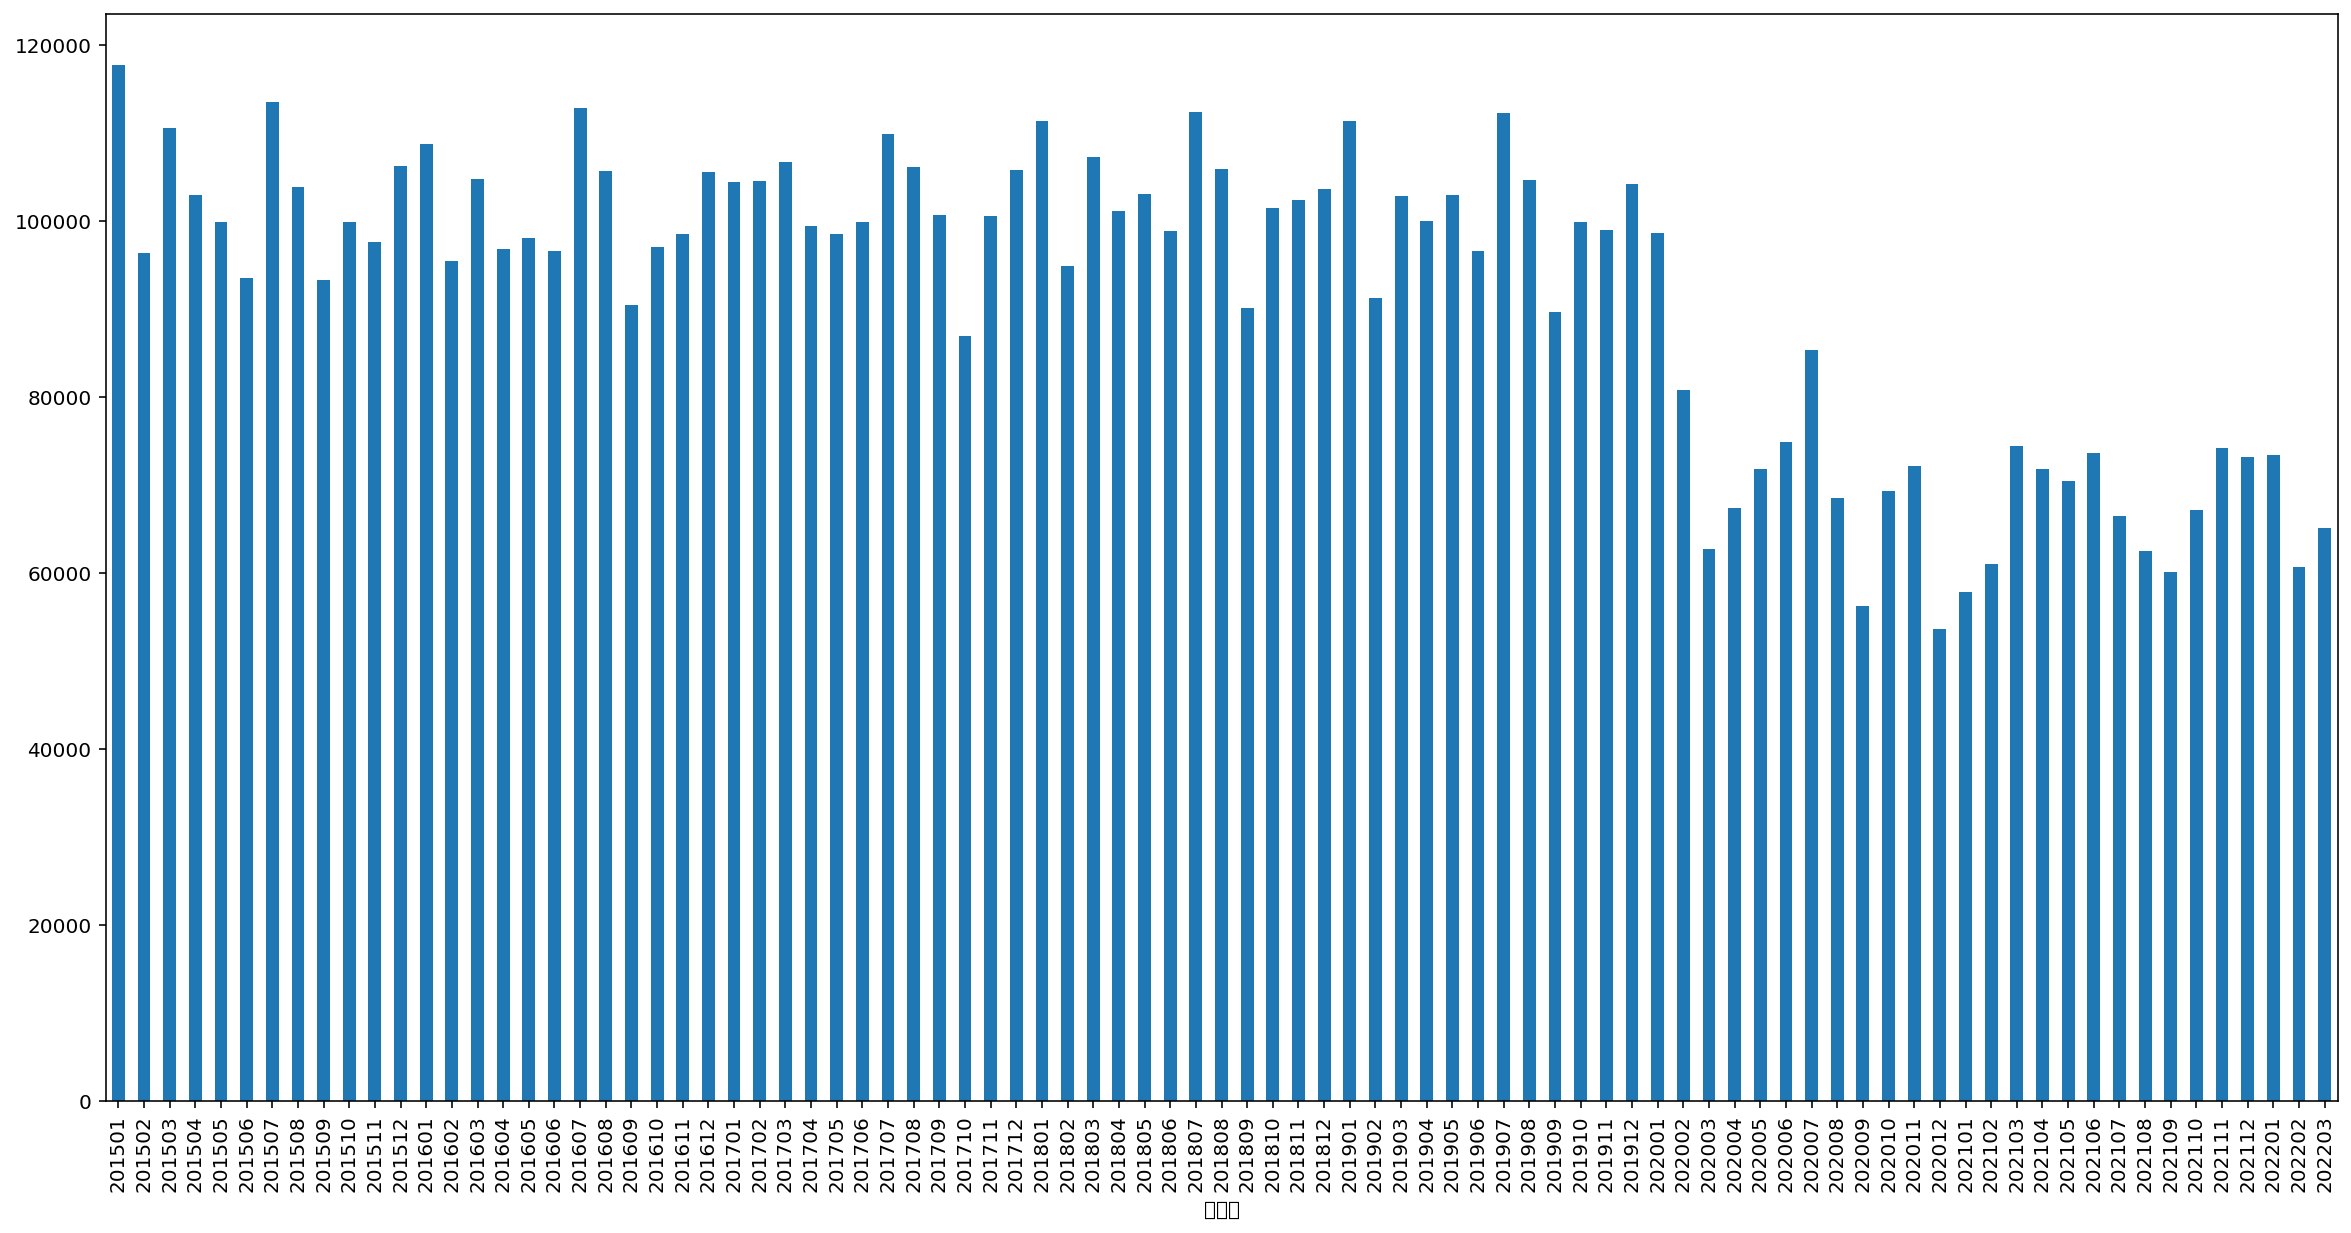

In [46]:
# 그래프 그리기
plt.figure(figsize=(20,10))

# sb_sum['MEAN'] 데이터를 bar 형식으로 그리기
GN_df['pass'].plot(kind=('bar'))

# X축 항목들의 대한 이름이 겹쳐서 90도 돌리기
plt.xticks(rotation=90)

In [47]:
# 코로나 이후 데이터는 지우기
GN_df_c = GN_df[GN_df.index<202001]
GN_df_c.tail()

,pass
사용월,
201501,117674.566667
201502,96313.400000
201503,110555.433333
201504,102900.833333
201505,99819.266667
201506,93480.400000
201507,113450.033333
201508,103880.966667
201509,93219.233333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

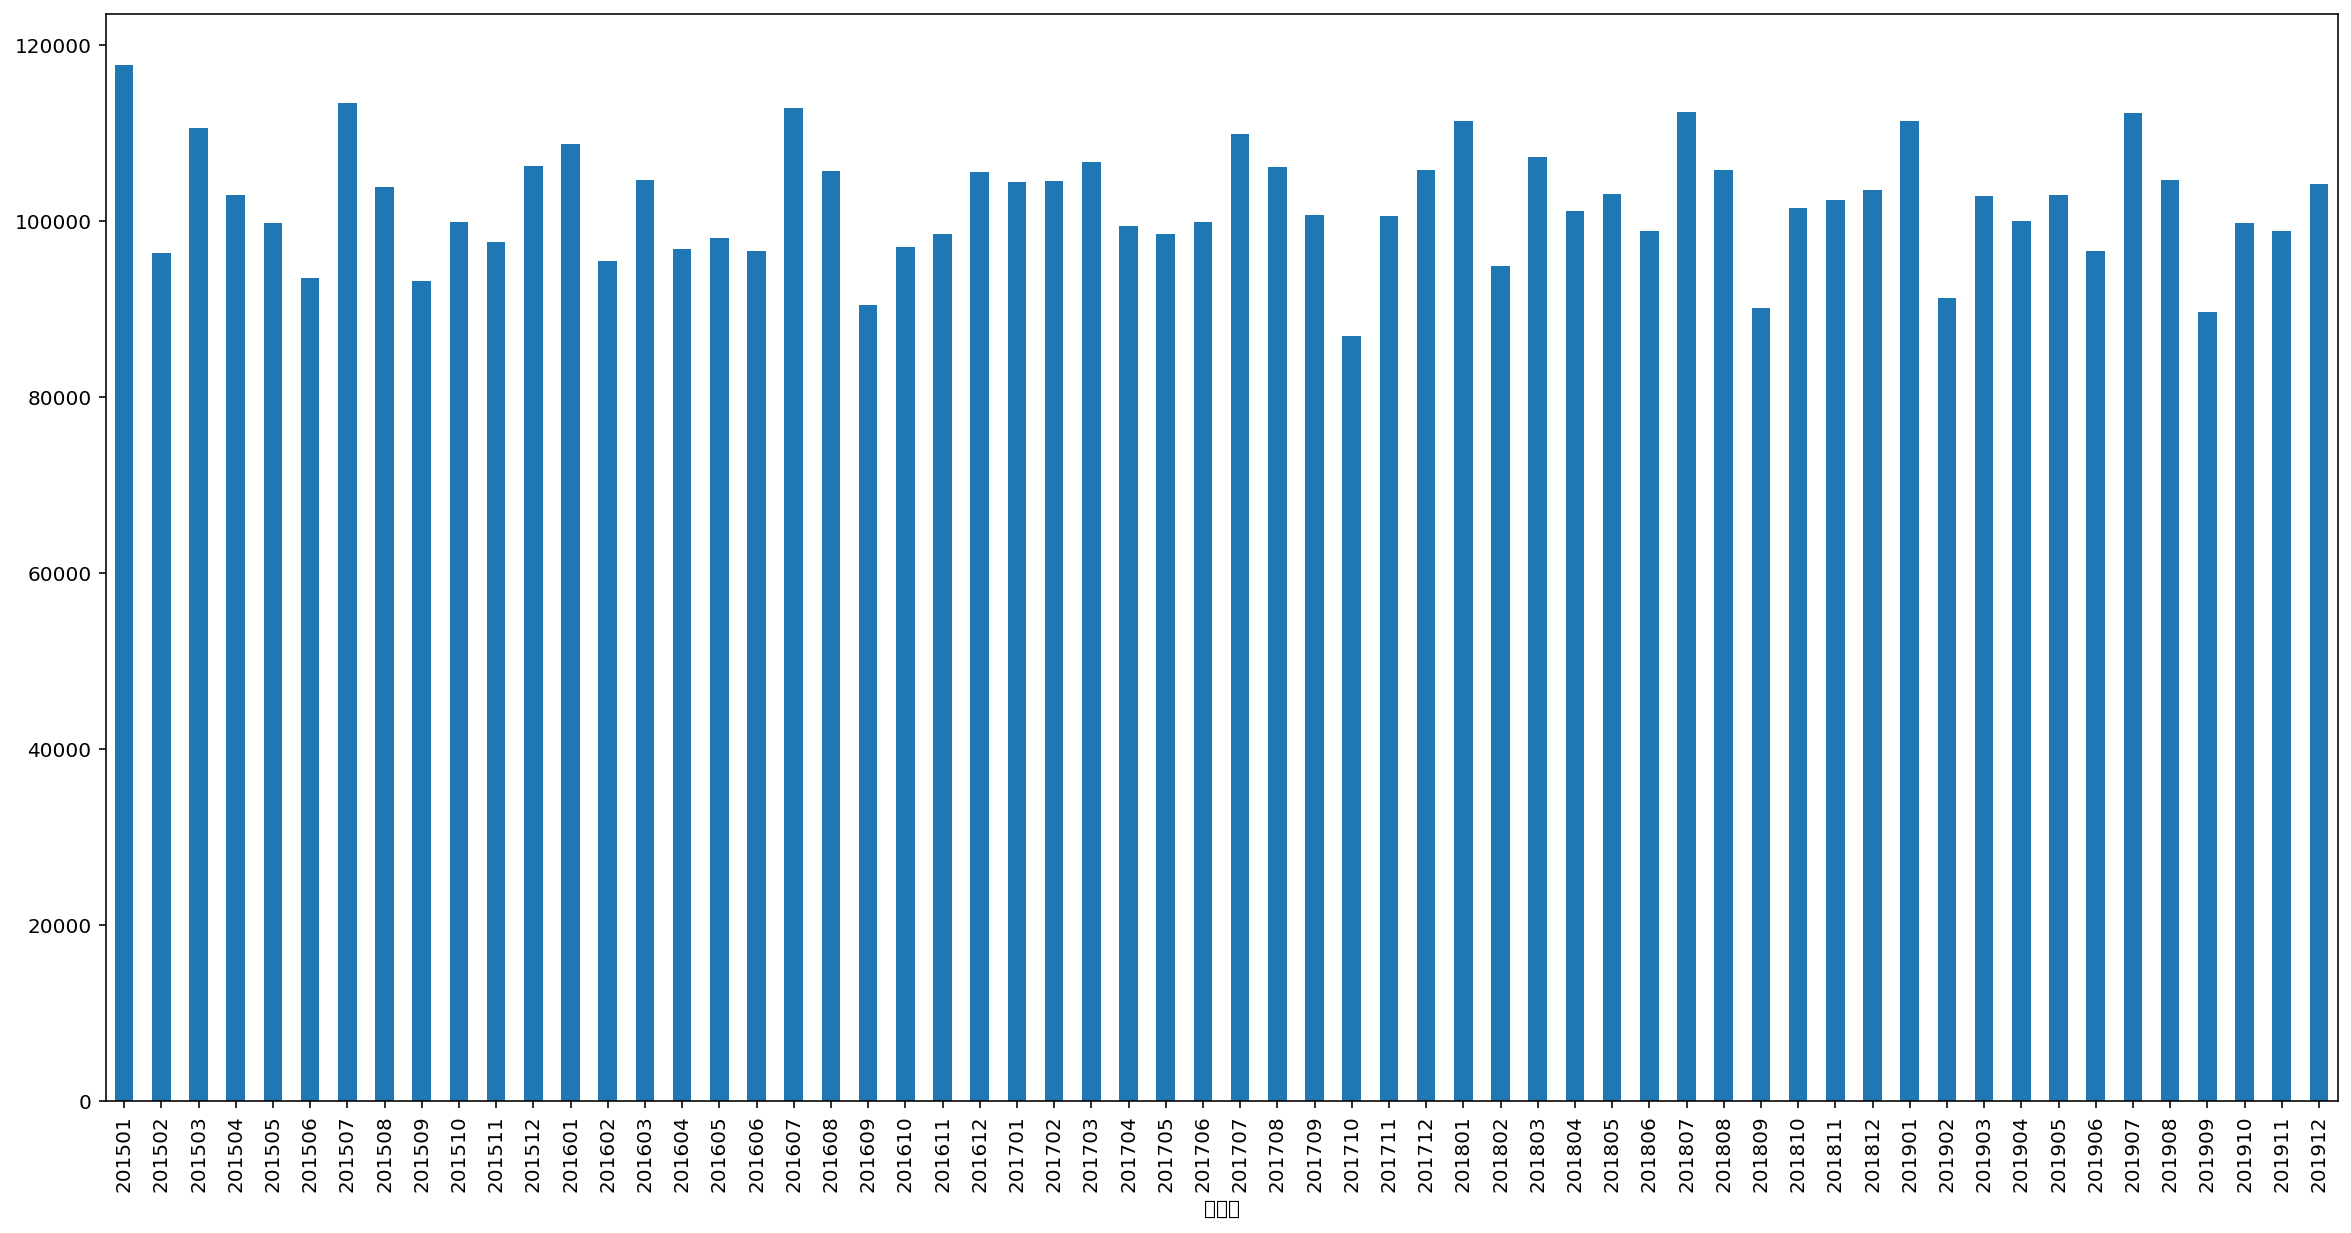

In [48]:
# 그래프 그리기
plt.figure(figsize=(20,10))

# 데이터를 bar 형식으로 그리기
GN_df_c["pass"].plot(kind=('bar'))

# X축 항목들의 대한 이름이 겹쳐서 90도 돌리기
plt.xticks(rotation=90)

In [34]:
# Path of the file to read
weather_filepath = "../content/extremum_20220512001757.csv"

# Read the file into a variable spotify_data
weather_data = pd.read_csv(weather_filepath, index_col=False, encoding='CP949')
weather_data.head()

,지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자,Unnamed: 10,Unnamed: 11
0,108.0,서울,Jan-15,-0.9,3.6,9.0,2015-01-15,-4.8,-9.8,2015-01-01,NaN,NaN
1,108.0,서울,Feb-15,1.0,6.0,13.0,2015-02-15,-2.9,-13.0,2015-02-09,NaN,NaN
2,108.0,서울,Mar-15,6.3,12.4,21.9,2015-03-20,1.0,-6.9,2015-03-10,NaN,NaN
3,108.0,서울,Apr-15,13.3,18.8,28.3,2015-04-30,8.4,3.5,2015-04-08,NaN,NaN
4,108.0,서울,May-15,18.9,24.9,32.2,2015-05-28,13.6,8.3,2015-05-05,NaN,NaN


In [61]:
weather = weather_data.drop(columns={'지점번호', '지점명', '최고기온일자','최저기온일자'})
weather=weather.dropna(axis=1, how='all')
weather=weather.dropna(how='all')
weather.set_index('일시')

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
일시,,,,,
Jan-15,-0.9,3.6,9.0,-4.8,-9.8
Feb-15,1.0,6.0,13.0,-2.9,-13.0
Mar-15,6.3,12.4,21.9,1.0,-6.9
Apr-15,13.3,18.8,28.3,8.4,3.5
May-15,18.9,24.9,32.2,13.6,8.3
...,...,...,...,...,...
Nov-21,8.2,13.1,21.3,4.0,-3.7
Dec-21,0.6,5.1,13.3,-3.5,-15.5
Jan-22,-2.2,2.6,8.4,-6.2,-11.3


In [63]:
weather.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86],
           dtype='int64')

In [66]:
# 코로나 이전 데이터만 가져오기

weather_c = weather[weather.index<=59]
weather_c.set_index('일시')

,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
일시,,,,,
Jan-15,-0.9,3.6,9.0,-4.8,-9.8
Feb-15,1.0,6.0,13.0,-2.9,-13.0
Mar-15,6.3,12.4,21.9,1.0,-6.9
Apr-15,13.3,18.8,28.3,8.4,3.5
May-15,18.9,24.9,32.2,13.6,8.3
Jun-15,23.6,29.5,34.9,18.9,15.6
Jul-15,25.8,30.0,36.0,22.6,18.2
Aug-15,26.3,30.8,34.4,22.8,18.9
Sep-15,22.4,28.1,31.0,17.5,14.2


Text(0, 0.5, 'log_passenger')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


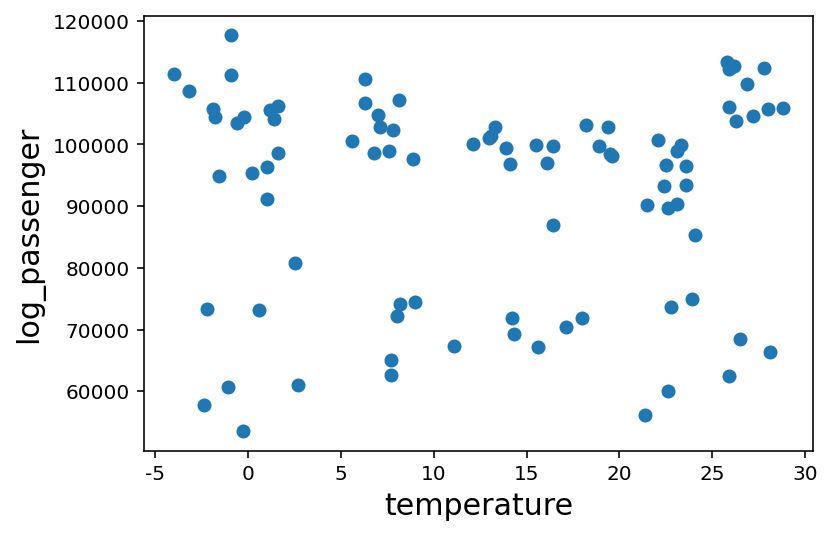

In [45]:
plt.scatter(weather['평균기온(℃)'], GN_df['pass'])
plt.xlabel("temperature", fontsize=15)
plt.ylabel("log_passenger", fontsize=15)

Text(0, 0.5, 'log_passenger')

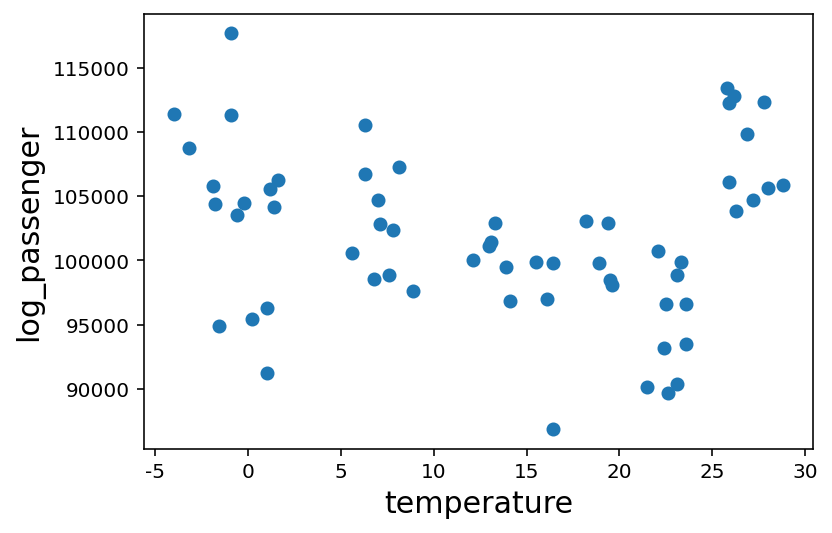

In [67]:
plt.scatter(weather_c['평균기온(℃)'], GN_df_c['pass'])
plt.xlabel("temperature", fontsize=15)
plt.ylabel("log_passenger", fontsize=15)

In [69]:
x = weather_c[['평균기온(℃)']]
y = GN_df_c[['pass']]

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly=poly_features.fit_transform(x)
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변행해준다

In [71]:
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [72]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model_lr.fit(x,y)
print(model_lr.steps[1][1].coef_)

[[-952.45950636   34.9388838 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'mean_passenger')

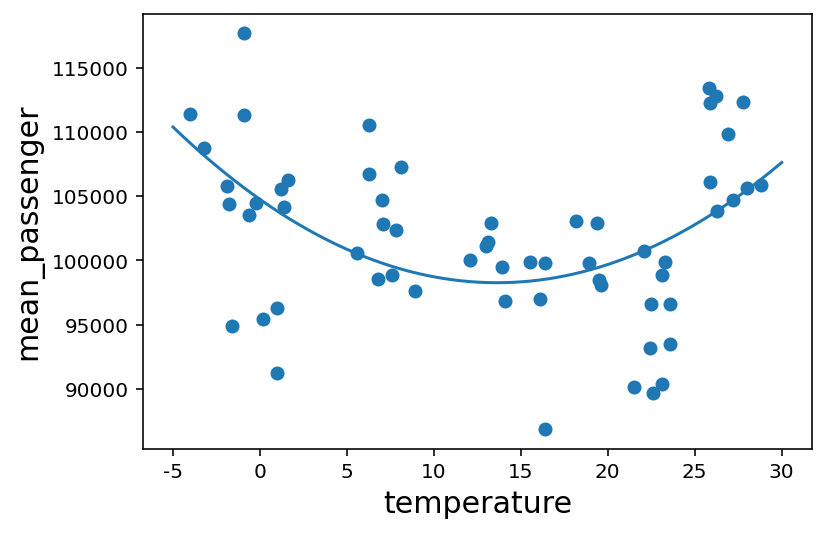

In [77]:
# 다항회귀 그래프
xx = np.linspace(-5,30,120000)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(weather_c['평균기온(℃)'], GN_df_c['pass'])
plt.xlabel("temperature", fontsize=15)
plt.ylabel("mean_passenger", fontsize=15)